In [ ]:
# Create an “Academic performance” dataset of students and
# perform the following operations using Python.
# 1. Scan all variables for missing values and inconsistencies. If
# there are missing values and/or inconsistencies, use any of
# the suitable techniques to deal with them.
# 2. Scan all numeric variables for outliers. If there are outliers,
# use any of the suitable techniques to deal with them.
# 3. Apply data transformations on at least one of the variables.
# The purpose of this transformation should be one of the
# following reasons: to change the scale for better
# understanding of the variable, to convert a non-linear relation
# into a linear one, or to decrease the skewness and convert the
# distribution into a normal distribution.
# Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/yashbhoomkar/Desktop/pythonCodes/practical/practTwo/dataset.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df = df.rename(columns={
    "gender" : "sex" ,
    "race/ethnicity" : "race",
    "parental level of education" : "parent_education",
    "lunch" : "meal",
    "test preparation course" : "prep_course",
    "math score" : "math_score",
    "reading score" : "reading_score",
    "writing score" : "writing_score", 
                   })

In [8]:
df.head()

,sex,race,parent_education,meal,prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.isnull().sum()

sex                 0
race                0
parent_education    0
meal                0
prep_course         0
math_score          0
reading_score       0
writing_score       0
dtype: int64

<Axes: ylabel='writing_score'>

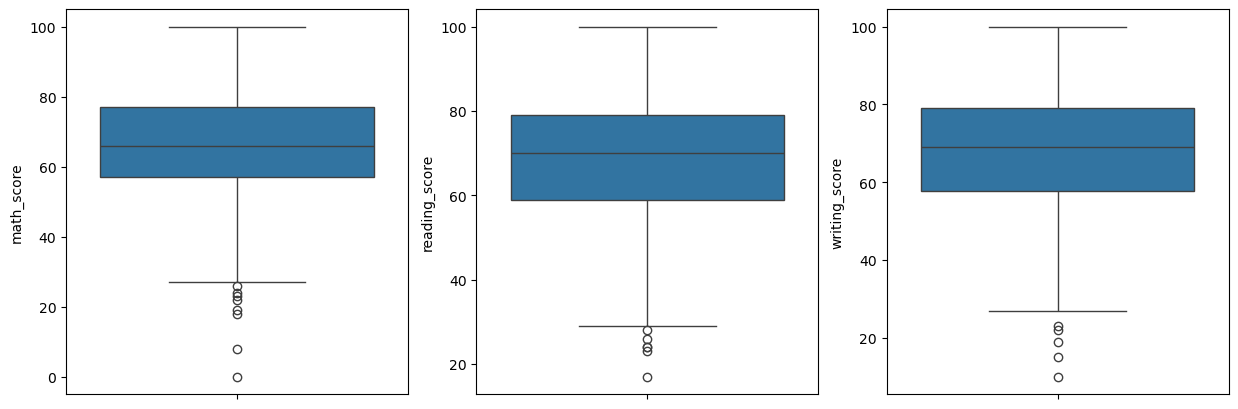

In [10]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 5))

sns.boxplot(data = df["math_score"] , ax = axes[0])
sns.boxplot(data = df["reading_score"] , ax = axes[1])
sns.boxplot(data = df["writing_score"] , ax = axes[2])

In [11]:
def remove_outliers(feature):
    global df
    q3 = np.percentile(df[feature] , 75)
    q1 = np.percentile(df[feature] , 25)

    iqr = q3 - q1

    df = df[ (df[feature] <= q3 + 1.5 * iqr)  & (df[feature] >= q1 - 1.5 * iqr) ]

In [12]:
remove_outliers("math_score")
remove_outliers("reading_score")
remove_outliers("writing_score")

<Axes: ylabel='writing_score'>

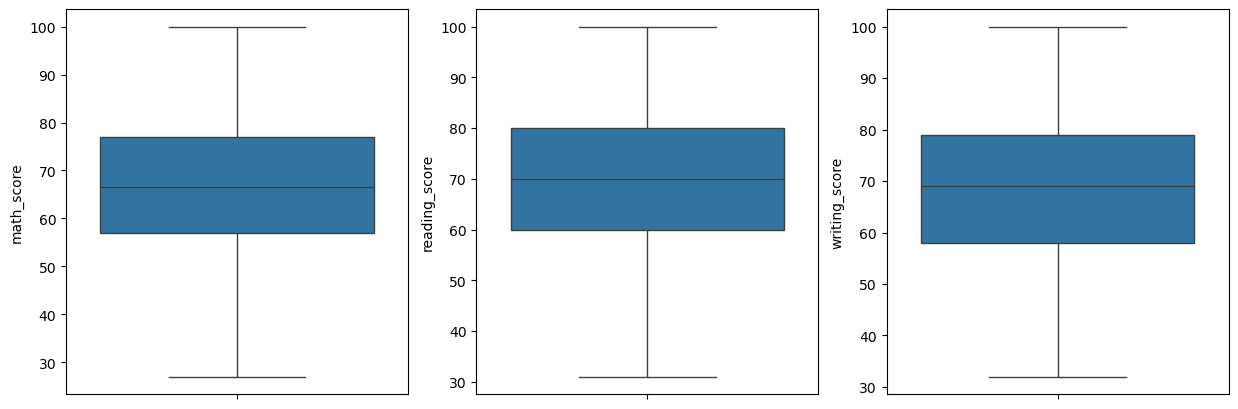

In [14]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 5))

sns.boxplot(data = df["math_score"] , ax = axes[0])
sns.boxplot(data = df["reading_score"] , ax = axes[1])
sns.boxplot(data = df["writing_score"] , ax = axes[2])


In [15]:
df.dtypes

sex                 object
race                object
parent_education    object
meal                object
prep_course         object
math_score           int64
reading_score        int64
writing_score        int64
dtype: object

In [16]:
df["race"].value_counts()

race
group C    315
group D    261
group B    183
group E    139
group A     88
Name: count, dtype: int64

In [17]:
df["parent_education"].value_counts()

parent_education
some college          222
associate's degree    221
high school           191
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["sex_enc"] = encoder.fit_transform(df["sex"])
df["race_enc"] = encoder.fit_transform(df["race"])
df["meal_enc"] = encoder.fit_transform(df["meal"])
df["test_enc"] = encoder.fit_transform(df["prep_course"])

In [19]:
df.head()

,sex,race,parent_education,meal,prep_course,math_score,reading_score,writing_score,sex_enc,race_enc,meal_enc,test_enc
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,1,1


In [21]:
def min_max_normalization(feature):
    global df
    min = df[feature].min()
    max = df[feature].max()

    df[feature] = (df[feature] - min) / (max - min)
    

In [22]:
min_max_normalization("math_score")
min_max_normalization("reading_score")
min_max_normalization("writing_score")

<Axes: ylabel='writing_score'>

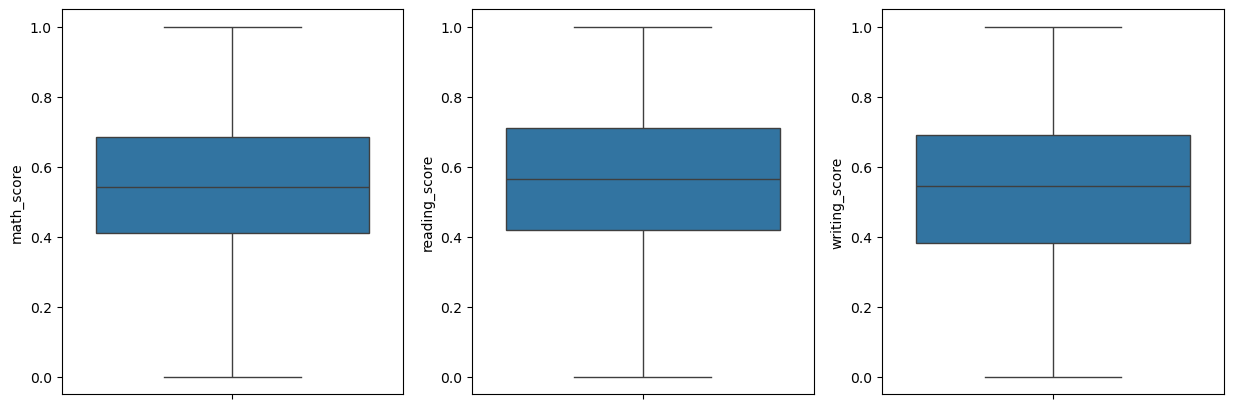

In [25]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df["math_score"], ax=axes[0])
sns.boxplot(data=df["reading_score"], ax=axes[1])
sns.boxplot(data=df["writing_score"], ax=axes[2])